# Imai and Keane (2004)

This notebook will explore and replicate the lifecycle savings and labor supply model of [Imai and Keane (2004)](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1468-2354.2004.00138.x). I will first introduce their model with their notation and discuss a few key findings of the paper. Then, I will introduce a simplified version of the model to begin the replication exercise.

The main goal of the paper is to reconcile the macro- and micro- estimate of the intertemporal elasticity of subsitition in labor supply. Imai and Keane conclude that estimates from the microeconomic literature are often biased towards zero because they ignore human capital effects (of course, this was more true at the time of publication than it would be today). By human capital, they refer to endogeneous wages which are accumulated through a *learning by doing* process: an hour of work today increases my wages in the future. Once human capital is accounted for, they find a fairly high i.e.s. of 3.82, in line with the numbers used in macro models.

The key intuition is shown in figure 1 from their paper, recreated here:

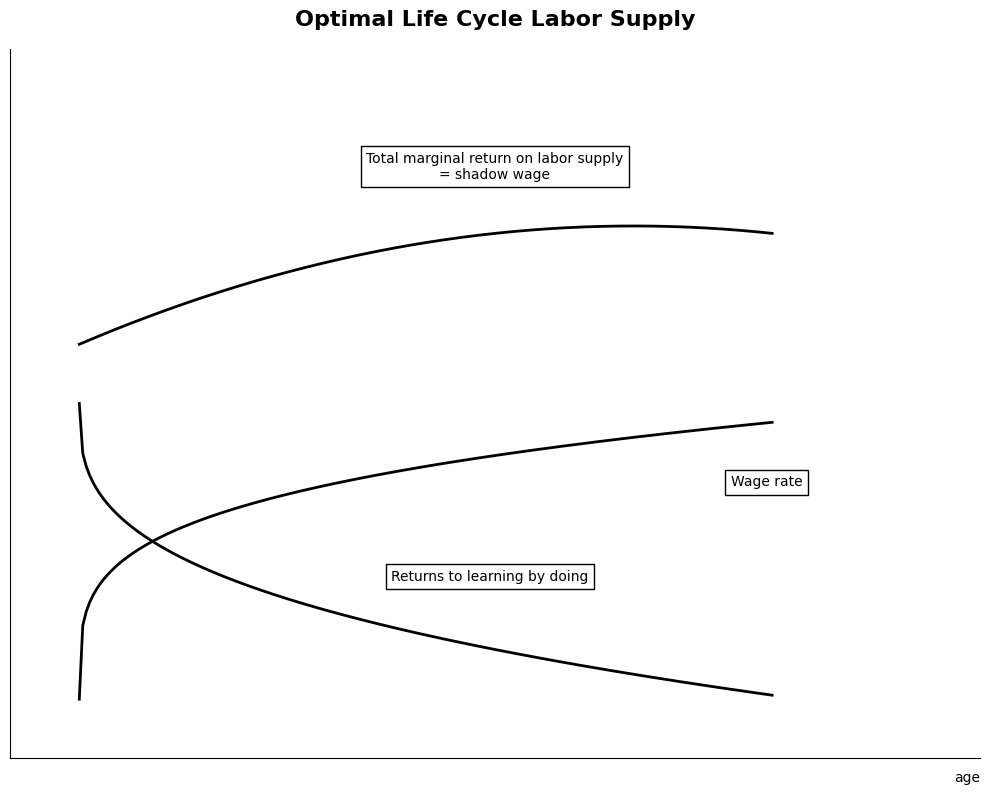

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Set up the axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove default axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Add custom axis labels
ax.text(7, -0.2, 'age', ha='right')

# Plot the curves
x = np.linspace(0, 5, 200)

# Wage rate
y1 = (6*x)**(1/4) + 0.5
ax.plot(x+0.5, y1, 'k-', linewidth=2)
ax.text(5.2, 2.3, 'Wage rate', bbox=dict(facecolor='white', edgecolor='black'))

# Returns to learning by doing
y2 = -(3*x)**(1/3) + 3
ax.plot(x+0.5, y2, 'k-', linewidth=2)
ax.text(2.75, 1.5, 'Returns to learning by doing', bbox=dict(facecolor='white', edgecolor='black'))

# Total marginal return (shadow wage) - Shifted upwards
x3 = np.linspace(1, 6, 200)
y3 = 2 - ((x3-1)/4 - 1)**2 + 2.5  # Increased the constant from 2 to 2.5 for upward shift
ax.plot(x3-0.5, y3, 'k-', linewidth=2)
ax.text(3.5, 5.0, 'Total marginal return on labor supply\n= shadow wage', 
        bbox=dict(facecolor='white', edgecolor='black'), ha='center', va='center')

# Set limits
ax.set_xlim(0, 7)
ax.set_ylim(0, 6)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Add title
plt.title('Optimal Life Cycle Labor Supply', y=1.02, fontsize=16, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

The intuition is this. An hour of work today rewards the agent with a wage, but it also increases utility through the rest of the lifecycle by increasing future wages and thus earnings. At younger ages, the returns to work may be much larger than the wage because increased human capital brings significant returns during later years of work. When agents are older, their wages are higher but the returns to increased human capital are lower because they have fewer future years of work. The net result is a reasonably flat *shadow wage* which captures the net returns to work.

If the econometrician focuses solely on the variation between hourly wage and hours of work, the reasonably flat lifetime profile of hours and reasonably steep profile of wages will erroneously suggest a weak relationship between the two. Accounting for the full returns to work inclusive of human capital accumulation leads to a much higher responsiveness and leads to the higher i.e.s. that Imai and Keane find.

## The model

Now I will present the full model from Imai and Keane (2004).

### Utility 

Agents receive utility from consumption, given by a CRRA specification. In order to discourage agents from borrowing when young to smooth consumption across the lifecycle, the authors introduce *age effects* into utility. They do so with a linear spline $A(s_t)$ where $s_t$ is the agent's age at time period $t$. $A(s_t) = C_0 C_1$ at age 20, gradually moves to $C_0 C_2$ at age 25, and ends at $C_0$ at age 33, whree it remains for the rest of the lifecycle. Thus utility from consumption is:

$$
u(c_t) = \dfrac{c_t^{\alpha_1}}{\alpha_2}
$$

Where $\alpha_1 < 1$. Agents incure disutility from hours worked, which similarly follows a CRRA specification and is subject tp a lognormal shock:

$$
v(h_t,\epsilon_{2t}) = \epsilon_{2t} b \dfrac{h_t^{\alpha_2}}{\alpha_2}
$$

Where $b > 0$ and $\alpha_2 > 1$. 

The budget constraint is given by:

$$
A_{t+1} = (1 +r)A_t + W_{t,s} h_t - c_t
$$

Where $W_{t,s}$ is he hourly wage and $r$ is the risk-free interest rate and is set to 0.05. 

Agents will choose control variables $h_t$ and $c_t$ to maximize their lifetime expected value:

$$
V_{t,s}(A_t, K_t, \epsilon_{2,t}) = \text{max}_{c_t,h_t} \{A(s_t) u(c_t) - v(h_t,\epsilon_{2t}) + \beta E \left[ V_{t+1, s+1} (A_{t+1}, K_{t+1}, \epsilon_{2,t+1} ) \right]\}
$$

Where $\beta$ is the discount factor.

### Human capital

I will now present the process for human capital. The law of motion is:

$$
g(K_t, h_t, t) = k_0 + \delta K_t + G(K_t, h_t, t)
$$

$k_0$ is a wage intercept (which can be thought of as a minimum wage, since this is the minimum level of human capital any agent can have), $\delta$ is a depreciation rate, and $G(K_t, h_t, t)$ is the human capital production function. $G$ is given by:
